# Eficiencia geométrica

En este apartado de la memoria estudiaremos la caracterización geométrica de nuestro montaje que, sumada a la eficiencia intrínseca de los detectores, nos permitirá corregir las tasas de detección.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from tabulate import tabulate
import scipy.special as se

In [3]:
N = int(1e6) #número de partículas incidentes

N_detectores = 4 #número de detectores
d = 0.25 #distancia entre placas
long_x = 30 #cm
long_y = 30 #cm
grosor = 1 #cada placa tiene un grosor de 1 cm

#almacenamos la coordenadas de la partícula a la altura de cada detector
x = np.zeros([N_detectores])
y = np.zeros([N_detectores])
    
#guardaremos el número de detecciones en cada detector
detector = np.zeros([N_detectores])

#guardamos el ángulo en el que se ha detectado una partícula
angulos_det = [[] for i in range(N_detectores)]

for j in range(N):
    r = rd.uniform(0, 1)
    
    #generamos los ángulos de incidencia como se muestra en el guión: theta según su función, phi como aleatorio en el plano por simetría 
    phi = rd.uniform(0, 2*np.pi)
    theta = np.arccos((1-r)**(1/4))

    #generamos un punto (x,y) aleatorio en la superficie del primer detector, donde ha incidido una partícula
    x1 = rd.uniform(0, long_x)
    y1 = rd.uniform(0, long_y)
    
    #iteramos para el número de detectores del que dispongamos
    for i in range(N_detectores):
        x[i] = x1 + i*(d+grosor)*np.tan(theta)*np.cos(phi)
        y[i] = y1 + i*(d+grosor)*np.tan(theta)*np.sin(phi)

        if 0 < x[i] < long_x and 0 < y[i] < long_y: #vemos si los resultados caen dentro del detector
            detector[i] += 1 #si es así, añadimos una cuenta al detector i
            angulos_det[i].append(theta)

#Definimos los porcentajes de detección por placa
Ef = np.zeros([N_detectores])
for k in range(N_detectores):
    Ef[k] = detector[k]/N    

#Mostramos los resultados
resultados = [['A', detector[0] , Ef[0]*100],
['B', detector[1], Ef[1]*100],
['C', detector[2], Ef[2]*100],
['D', detector[3], Ef[3]*100]]

print (tabulate(resultados, headers=["Detector", "Partículas detectadas", "% detección"], tablefmt='fancy_grid'))

╒════════════╤═════════════════════════╤═══════════════╕
│ Detector   │   Partículas detectadas │   % detección │
╞════════════╪═════════════════════════╪═══════════════╡
│ A          │                   1e+06 │      100      │
├────────────┼─────────────────────────┼───────────────┤
│ B          │              958715     │       95.8715 │
├────────────┼─────────────────────────┼───────────────┤
│ C          │              918750     │       91.875  │
├────────────┼─────────────────────────┼───────────────┤
│ D          │              879935     │       87.9935 │
╘════════════╧═════════════════════════╧═══════════════╛


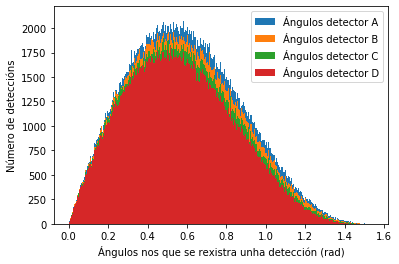

In [4]:
frecA, xbinsA, _ = plt.hist(angulos_det[0], bins = 1000, label='Ángulos detector A')#, color='#53868B')
frecB, xbinsB, _ = plt.hist(angulos_det[1], bins = 1000, label='Ángulos detector B')#, color='#3D9140')
frecC, xbinsC, _ = plt.hist(angulos_det[2], bins = 1000, label='Ángulos detector C')#, color='#9932CC')
frecD, xbinsD, _ = plt.hist(angulos_det[3], bins = 1000, label='Ángulos detector D')#, color='#FFC125')
plt.xlabel('Ángulos nos que se rexistra unha detección (rad)')
plt.ylabel('Número de deteccións')
plt.legend(loc='best')
plt.savefig('theta.pdf')
plt.show()

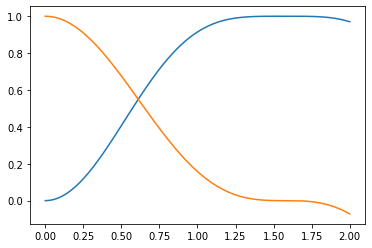

In [43]:
def f(theta):
    return (np.cos(theta))**3

def F(theta):
    return 1 - (np.cos(theta))**4

t = np.linspace(0, 2, 1000)
plt.plot(t, F(t))
plt.plot(t, f(t))